<a href="https://colab.research.google.com/github/owilli38/DSBA-6162/blob/main/DSBA6162_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will implement a Q-learning agent to learn an optimal policy for navigating a maze environment. Your tasks include constructing the transition probability matrix, defining the reward matrix, specifying the possible action matrix, and performing Q-value updates using Temporal-Difference (TD) learning. The environment consists of several interconnected rooms, with the agent (a mouse) initially located in Room 2 and aiming to reach the cheese located in a designated goal room. After training the agent, you are required to report the best path(s) the mouse can take from Room 2 to the cheese based on the learned Q-values.

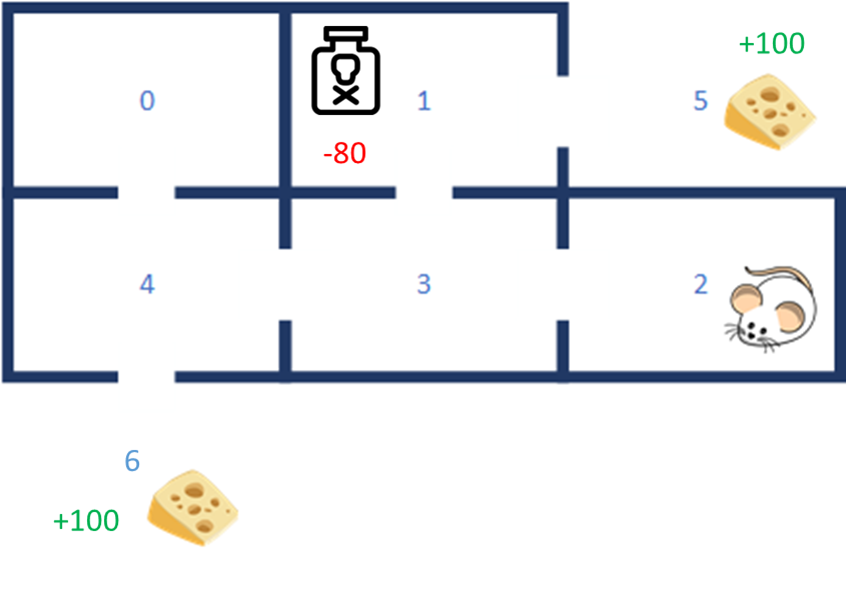


### Q-Learning

Adapted from the Q-Value Iteration algorithm for situations in which transitions and rewards are initially unknown, **Q-Learning** watches the agent play and gradually improves its estimations of the Q-values. Once it has accurate Q-Value estimates (or close enough), then the optimal policy is choosing the action that has the highest Q-Value (i.e. the *greedy* policy).

$$Q(s) \underset{\alpha}\leftarrow r + \gamma \cdot \underset{a}{max} \;Q(s',a')$$

In [ ]:
import numpy as np

NUM_STATES = 7

T = np.zeros((NUM_STATES, NUM_STATES), dtype=int)


# State 0 connections
T[0, 4] = 1

# State 1 connections
T[1, 3] = 1
T[1, 5] = 1

# State 2 connections
T[2, 3] = 1

# State 3 connections
T[3, 1] = 1
T[3, 2] = 1
T[3, 4] = 1

# State 4 connections
T[4, 0] = 1
T[4, 3] = 1
T[4, 6] = 1

# State 5 (Goal) connections - allows exiting or self-loop
T[5, 1] = 1
T[5, 5] = 1 # Self-loop

# State 6 (Goal) connections - allows exiting or self-loop
T[6, 4] = 1
T[6, 6] = 1 # Self-loop

print("--- Final 7-State Connectivity Matrix (T) ---\n" \
      "T[i, j] = 1 means a move from i to j is possible.\n")
print(T)

--- Final 7-State Connectivity Matrix (T) ---
T[i, j] = 1 means a move from i to j is possible.

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0]
 [0 1 1 0 1 0 0]
 [1 0 0 1 0 0 1]
 [0 1 0 0 0 1 0]
 [0 0 0 0 1 0 1]]


In [ ]:
import numpy as np

R = np.full((NUM_STATES, NUM_STATES), INVALID_MOVE, dtype=float)

for i in range(NUM_STATES):
    for j in range(NUM_STATES):
        if T[i, j] == 1:
            if j == 5 or j == 6:
                R[i, j] = 100.0
            elif j == 1:
                R[i, j] = -80.0
            else:
                R[i, j] = -1.0

print("--- Updated 7-State Reward Matrix (R) based on T ---\n" \
      "R[i, j] is the immediate reward for moving from i to j.\n")
print(np.round(R))

--- Updated 7-State Reward Matrix (R) based on T ---
R[i, j] is the immediate reward for moving from i to j.

[[-1.e+09 -1.e+09 -1.e+09 -1.e+09 -1.e+00 -1.e+09 -1.e+09]
 [-1.e+09 -1.e+09 -1.e+09 -1.e+00 -1.e+09  1.e+02 -1.e+09]
 [-1.e+09 -1.e+09 -1.e+09 -1.e+00 -1.e+09 -1.e+09 -1.e+09]
 [-1.e+09 -8.e+01 -1.e+00 -1.e+09 -1.e+00 -1.e+09 -1.e+09]
 [-1.e+00 -1.e+09 -1.e+09 -1.e+00 -1.e+09 -1.e+09  1.e+02]
 [-1.e+09 -8.e+01 -1.e+09 -1.e+09 -1.e+09  1.e+02 -1.e+09]
 [-1.e+09 -1.e+09 -1.e+09 -1.e+09 -1.e+00 -1.e+09  1.e+02]]


In [ ]:
import numpy as np

possible_actions = {}


for i in range(NUM_STATES):
    actions_for_state = []
    for j in range(NUM_STATES):
        if T[i, j] == 1:
            actions_for_state.append(j)
    possible_actions[i] = actions_for_state

print("--- Updated Possible Actions Dictionary based on T ---\n" \
      "Key: Current State (Room i)\n" \
      "Value: List of Possible Next States (Rooms j)\n")
print(possible_actions)

--- Updated Possible Actions Dictionary based on T ---
Key: Current State (Room i)
Value: List of Possible Next States (Rooms j)

{0: [4], 1: [3, 5], 2: [3], 3: [1, 2, 4], 4: [0, 3, 6], 5: [1, 5], 6: [4, 6]}


In [ ]:
Q_values = init_q_values()

alpha0 = 0.05  # initial learning rate
decay = 0.005  # learning rate decay
gamma = 0.8  # discount factor
n_iterations_q_learning = 10000
state = 0  # initial state
history_q_learning = []  # Training history

for iteration in range(n_iterations_q_learning):
    history_q_learning.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    if len(possible_actions[next_state]) > 0:

        valid_q_values_next_state = Q_values[next_state, possible_actions[next_state]]
        if valid_q_values_next_state.size > 0:
            next_q_value = np.max(valid_q_values_next_state)
        else:
            next_q_value = 0.0
    else:
        next_q_value = 0.0

    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha

    Q_values[state, action] += alpha * (reward + gamma * next_q_value)
    state = next_state

history_q_learning = np.array(history_q_learning)

print("Q-learning algorithm re-run with updated R and possible_actions.")

Q-learning algorithm re-run with updated R and possible_actions.


In [ ]:
print(Q_values)
print_optimal_actions(Q_values)

[[-1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
   1.09936250e+02 -1.00000000e+09 -1.00000000e+09]
 [-1.00000000e+09 -1.00000000e+09 -1.00000000e+09  5.56268716e+01
  -1.00000000e+09  2.39222323e+02 -1.00000000e+09]
 [-1.00000000e+09 -1.00000000e+09 -1.00000000e+09  5.35810972e+01
  -1.00000000e+09 -1.00000000e+09 -1.00000000e+09]
 [-1.00000000e+09  6.31052245e+01  2.16192993e+01 -1.00000000e+09
   1.13287411e+02 -1.00000000e+09 -1.00000000e+09]
 [ 5.12136114e+01 -1.00000000e+09 -1.00000000e+09  5.62228156e+01
  -1.00000000e+09 -1.00000000e+09  2.00207181e+02]
 [-1.00000000e+09  6.54302385e+01 -1.00000000e+09 -1.00000000e+09
  -1.00000000e+09  2.42665513e+02 -1.00000000e+09]
 [-1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
   1.07578272e+02 -1.00000000e+09  1.99423827e+02]]

--- Optimal Actions (Policy) ---
From State 0: Take action 4 (move to Room 4)
From State 1: Take action 5 (move to Room 5)
From State 2: Take action 3 (move to Room 3)
From State 

Starting from room 2, the optimal path for the mouse to reach the cheese is from 2 -> 3 -> 4 -> 6 for the cheese. It would be the same number of steps to room 5 (where cheese is), but requires passing through room 1 where there is a penalty state (-80).